# Open Ocean
# Open Earth Fundation
---------------------------------------------------------------------------------------------------------------------
Authors: Margaux Filippi & Maureen Fonseca

---------------------------------------------------------------------------------------------------------------------

<h1> Step 2: calculate different metrics for each modulating factor </h1>
    
This notebook is the second part of the Step1_Curate_IUCN_RedList.ipynb

<h2> Modulating Factor 5: Habitats' Survey  <h2>

<h2> Data needed for this project </h2>

The data was output by:
- Manual selection in [GEBCO](https://www.gebco.net/) 
- Overlap of [IUCN Ecosystem Typology](https://zenodo.org/record/5090419) with [ACMC shapefile](https://drive.google.com/drive/folders/11aaQs_R-jCE2ZwVBZVLjTAlleaJdOa_I?usp=share_link)

Under: 

`Ocean Program > data > data_processed > Bathymetry`

`Ocean Program > data > data_processed > Typology_ACMC V0`

### Importing libraries

In [5]:
import geopandas as gpd

In [6]:
import numpy as np
import pandas as pd

In [7]:
import os
import glob

In [8]:
from shapely.geometry import Polygon, Point

In [9]:
import fiona; #help(fiona.open)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import timeit

In [12]:
from netCDF4 import Dataset
import cmocean
import geopandas as gpd
from matplotlib.ticker import LinearLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

OEF functions

In [13]:
from marinebiodiversity_utils import *

<h1> 2.1. Load data </h1>

<h2> 2.1.1 Get the conservation area</h2>

Mostly for plotting.

<h3> Coordinates for Cocos Island </h3>

Cocos Island is located at 05°31′41″N; 87°03′40″W

In [14]:
Cocos_lat = 5+31/60+41/3600
Cocos_lon = -(87+3/60+40/3600)
Cocos = Point(Cocos_lon, Cocos_lat)

<h3> Import entire AMMB and PNIC </h3>

In [15]:
ACMC = gpd.read_file('../../Geospatial_ACMC/ACMC.shp')
AMMB = gpd.read_file('../../Geospatial_ACMC/AMMB.shp')
PNIC = gpd.read_file('../../Geospatial_ACMC/PNIC.shp')

Inspect the Coordinate Reference Systems (CRS).

In [16]:
AMMB.crs

<Derived Projected CRS: EPSG:5367>
Name: CR05 / CRTM05
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Costa Rica - onshore and offshore east of 86°30'W.
- bounds: (-86.5, 2.21, -81.43, 11.77)
Coordinate Operation:
- name: Costa Rica TM 2005
- method: Transverse Mercator
Datum: Costa Rica 2005
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
PNIC.crs

<Derived Projected CRS: EPSG:5367>
Name: CR05 / CRTM05
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Costa Rica - onshore and offshore east of 86°30'W.
- bounds: (-86.5, 2.21, -81.43, 11.77)
Coordinate Operation:
- name: Costa Rica TM 2005
- method: Transverse Mercator
Datum: Costa Rica 2005
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
AMMB_WGS84 = AMMB.to_crs(crs=4326)
PNIC_WGS84 = PNIC.to_crs(crs=4326)
ACMC = ACMC.set_crs(epsg=4326, allow_override=True)

In [19]:
ACMC['area']

0    1.062837e+07
Name: area, dtype: float64

Get area information.

In [20]:
print("Area, PNIC:")
print("{:0.2f}".format(PNIC_WGS84.area.item()) + " sqdeg.")
print("{:,.2f}".format(PNIC_WGS84.to_crs(crs=31970).area.item()*10**(-6)) + " sqkm in CRS 31970.")

print("\nArea, AMMB:")
print("{:0.2f}".format(AMMB_WGS84.area.item()) + " sqdeg.")
print("{:,.2f}".format(AMMB_WGS84.to_crs(crs=31970).area.item()*10**(-6)) + " sqkm in CRS 31970.")

print("\nTotal Area, ACMC:")
print("{:0.2f}".format(AMMB_WGS84.area.item() + PNIC_WGS84.area.item()) + " sqdeg.")
print("{:,.2f}".format(AMMB_WGS84.to_crs(crs=31970).area.item()*10**(-6) + PNIC_WGS84.to_crs(crs=31970).area.item()*10**(-6)) + " sqkm in CRS 31970.")

Area, PNIC:
4.47 sqdeg.
54,799.50 sqkm in CRS 31970.

Area, AMMB:
8.66 sqdeg.
106,243.90 sqkm in CRS 31970.

Total Area, ACMC:
13.13 sqdeg.
161,043.41 sqkm in CRS 31970.


/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_52326/2915868912.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print("{:0.2f}".format(PNIC_WGS84.area.item()) + " sqdeg.")
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_52326/2915868912.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print("{:0.2f}".format(AMMB_WGS84.area.item()) + " sqdeg.")
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_52326/2915868912.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print("{:0.2f}".format(AMMB_WGS84.area.item() + PNIC_WGS84.area.item()) + " sqdeg.")

<h1> 2.2. Preliminary calculations </h1> 

### Physical habitat types

Depth-defined marine ecological habitats
- epipelagic: 0-200m
- mesopelagic: 200-1000m
- bathypelagic: 1000-4000m
- abyssipelagic: 4000-6000m

In [21]:
area_of_conservation = ACMC.geometry.item()

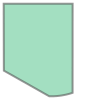

In [22]:
area_of_conservation

**Bathymetry data**

In [23]:
fname = "../../Bathymetry/Cocos.nc"
fh = Dataset(fname, 'r')

Import the specific variables.

In [24]:
Z = fh.variables["elevation"][:].data
lon = fh.variables["lon"][:].data
lat = fh.variables["lat"][:].data

Grid longitude and latitude for pcolor plot.

In [25]:
Lon, Lat = np.meshgrid(lon, lat)

The idea here is eliminate all the value > 0, i.e, we want to have only values for the ocean

In [26]:
ocean = np.multiply(Z,np.multiply(Z<=0, Z>np.min(Z)))
bathymetry = np.where(ocean==0, np.nan, ocean)

Let's go to make a function that calculates the different physical habitats

where z_0 is the shallowest depth

In [29]:
def physicalHabitat(z_0,z_1,z):
    Filter = np.multiply(z,np.multiply(z<=z_0, z>z_1))
    habitat = np.where(Filter==0, np.nan, Filter)
    return habitat

In [30]:
epipelagic = physicalHabitat(0,-200,bathymetry)
mesopelagic = physicalHabitat(-200,-1000,bathymetry)
bathypelagic = physicalHabitat(-1000,-4000,bathymetry)
abyssopelagic = physicalHabitat(-4000,-6000,bathymetry)

**Plots**

Text(1.0, 1.0, 'ACMC')

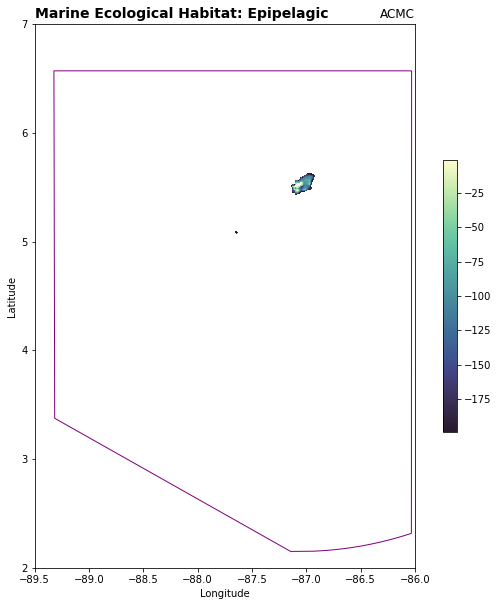

In [31]:
fig, ax = plt.subplots(figsize=(10,10))

pcol = ax.pcolor(Lon, Lat, epipelagic, cmap = cmocean.cm.deep_r);
cbar = fig.colorbar(pcol, ax=ax, shrink=0.5)

ACMC.plot(ax=ax, alpha = 1, edgecolor='purple', facecolor="none")

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_aspect('equal')
ax.set_title('Marine Ecological Habitat: Epipelagic', fontweight='bold', fontsize=14, loc='left')
ax.set_title('ACMC', fontsize=12, loc='right')

Text(1.0, 1.0, 'ACMC')

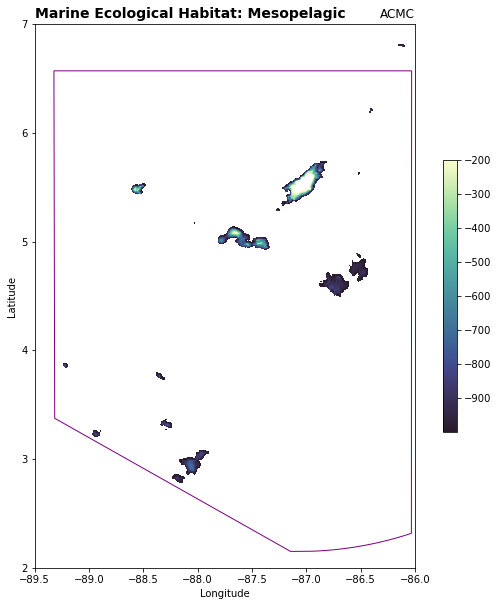

In [35]:
fig, ax = plt.subplots(figsize=(10,10))

pcol = ax.pcolor(Lon, Lat, mesopelagic, cmap = cmocean.cm.deep_r);
cbar = fig.colorbar(pcol, ax=ax, shrink=0.5)

ACMC.plot(ax=ax, alpha = 1, edgecolor='purple', facecolor="none")

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_aspect('equal')
ax.set_title('Marine Ecological Habitat: Mesopelagic', fontweight='bold', fontsize=14, loc='left')
ax.set_title('ACMC', fontsize=12, loc='right')

Text(1.0, 1.0, 'ACMC')

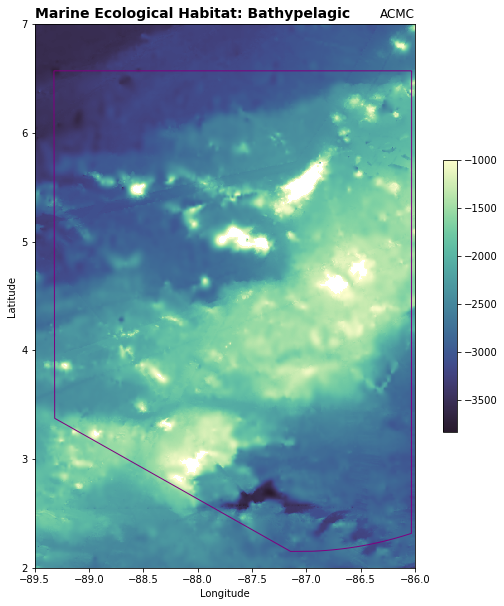

In [33]:
fig, ax = plt.subplots(figsize=(10,10))

pcol = ax.pcolor(Lon, Lat, bathypelagic, cmap = cmocean.cm.deep_r);
cbar = fig.colorbar(pcol, ax=ax, shrink=0.5)

ACMC.plot(ax=ax, alpha = 1, edgecolor='purple', facecolor="none")

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_aspect('equal')
ax.set_title('Marine Ecological Habitat: Bathypelagic', fontweight='bold', fontsize=14, loc='left')
ax.set_title('ACMC', fontsize=12, loc='right')

Text(1.0, 1.0, 'ACMC')

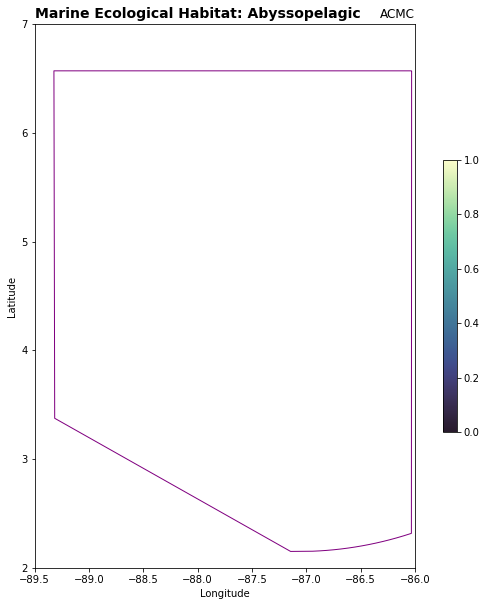

In [139]:
fig, ax = plt.subplots(figsize=(10,10))

pcol = ax.pcolor(Lon, Lat, abyssopelagic, cmap = cmocean.cm.deep_r);
cbar = fig.colorbar(pcol, ax=ax, shrink=0.5)

ACMC.plot(ax=ax, alpha = 1, edgecolor='purple', facecolor="none")

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_aspect('equal')
ax.set_title('Marine Ecological Habitat: Abyssopelagic', fontweight='bold', fontsize=14, loc='left')
ax.set_title('ACMC', fontsize=12, loc='right')

So, with the lasts plots we can see the physical habitats in ACMC, where the open ocean predomin.

TO BE COMPLETED!!!